# Pythonで動かしながら学ぶコンピュータネットワーク

## 第1章 コンピュータネットワークの基本要素

In [43]:
# Code1.1
class Node:
    def __init__(self, node_id, address=None):
        """
        ネットワーク内のノードを表すクラス
        
        :param node_id: ノードの一意の識別子
        :param address: ノードの簡易アドレス
        :param links: ノードに接続されたリンク
        """
        self.node_id = node_id
        self.address = address
        self.links = []
    
    def __str__(self):
        return f"ノード(ID: {self.node_id}, アドレス: {self.address})"
    
# 2つのノードを作成
node1 = Node(node_id=1, address="00:01")
node2 = Node(node_id=2, address="00:02")

# ノードの詳細を表示
print(node1)
print(node2)

ノード(ID: 1, アドレス: 00:01)
ノード(ID: 2, アドレス: 00:02)


In [10]:
# code1.2
class Node:
    def __init__(self,node_id,address=None):
        self.node_id = node_id
        self.address = address
        self.links = []

    # リンクを接続するメソッドを追加
    def add_link(self, link):
        if link not in self.links:
            self.links.append(link)
    
    # ノードの文字列表現を返すように修正
    def __str__(self):
        connected_nodes = [link.node_x.node_id if self != link.node_x else link.node_y.node_id for link in self.links]
        connected_nodes_str = ', '.join(map(str,connected_nodes))
        return f"ノード(ID: {self.node_id}, アドレス: {self.address}, 接続: {connected_nodes_str})"

class Link:
    def __init__(self, node_x, node_y, bandwidth=1, delay=0, packet_loss=0.0):
        """
        ネットワーク内の2つのノード間のリンクを表すLinkクラス。
        
        :param node_x: リンクの一方のノード。
        :param node_y: リンクのもう一方のノード。
        :param bandwidth: リンクの帯域幅（データ転送速度）。デフォルトは1。
        :param delay: リンクの遅延時間。デフォルトは0。
        :param packet_loss: リンクのパケットロス率（0.0から1.0の範囲）。デフォルトは0.0。
        """
        self.node_x = node_x
        self.node_y = node_y
        self.bandwidth = bandwidth
        self.delay = delay
        self.packet_loss = packet_loss

        # ノードに対して、リンクを接続
        node_x.add_link(self)
        node_y.add_link(self)

    def __str__(self):
        return f"リンク({self.node_x.node_id} ↔ {self.node_y.node_id}, 帯域幅: {self.bandwidth}, 遅延: {self.delay}, パケットロス率: {self.packet_loss})"

# 例；　ノード1とノード2をリンクで接続する
node1 = Node(node_id=1, address="00:01")
node2 = Node(node_id=2, address="00:02")
link = Link(node1,node2)

# ノードとリンクの詳細を表示
print(node1)
print(node2)
print(link)

ノード(ID: 1, アドレス: 00:01, 接続: 2)
ノード(ID: 2, アドレス: 00:02, 接続: 1)
リンク(1 ↔ 2, 帯域幅: 1, 遅延: 0, パケットロス率: 0.0)


In [11]:
# Code1.3
class Packet:
    def __init__(self, source, destination, payload):
        """
        ネットワーク内で送信されるパケットを表すPacketクラス。

        :param source: パケットの送信元ノードのアドレス。
        :param destination: バケットの宛先ノードのアドレス。
        :param payload: パケットに含まれるデータ(ペイロード)。
        """
        self.source = source
        self.destination = destination
        self.payload = payload
    
    def __str__(self):
        return f"パケット(送信元: {self.source}, 宛先: {self.destination}, ペイロード: {self.payload})"

In [17]:
# Code1.4
class Node:
    def __init__(self, node_id, address=None):
        self.node_id = node_id
        self.address = address
        self.links = []

    def add_link(self, link):
        if link not in self.links:
            self.links.append(link)
    
    # パケットを送信するメソッドを追加
    def send_packet(self, packet):
        if packet.destination == self.address:
            self.receive_packet(packet)
        else:
            for link in self.links:
                next_node = link.node_x if self != link.node_x else link.node_y
                print(f"ノード{self.node_id}からノード{next_node.node_id}へパケット転送")
                link.transfer_packet(packet, self)
                break
    
    # パケットを受信するメソッドを追加
    def receive_packet(self, packet):
        print(f"ノード{self.node_id}がパケット受信: {packet.payload}")

    def __str__(self):
        connected_nodes = [link.node_x.node_id if self != link.node_x else link.node_y.node_id for link in self.links]
        connected_nodes_str = ', '.join(map(str, connected_nodes))
        return f"ノード(ID: {self.node_id}, アドレス: {self.address}, 接続: {connected_nodes_str})"

In [19]:
# Code1.5
class Link:
    def __init__(self, node_x, node_y, bandwidth=1, delay=0, packet_loss=0.0):
        self.node_x = node_x
        self.node_y = node_y
        self.bandwidth = bandwidth
        self.delay = delay
        self.packet_loss = packet_loss

        node_x.add_link(self)
        node_y.add_link(self)

    # 次のノードへパケットを渡すメソッドを追加
    def transfer_packet(self, packet, from_node):
        next_node = self.node_x if from_node != self.node_x else self.node_y
        next_node.receive_packet(packet)

    def __str__(self):
        return f"リンク({self.node_x.node_id} ↔ {self.node_y.node_id}, 帯域幅: {self.bandwidth}, 遅延: {self.delay}, パケットロス率: {self.packet_loss})"

In [20]:
# Code1.6
node1 = Node(node_id=1, address="00:01")
node2 = Node(node_id=2, address="00:02")

link1 = Link(node1, node2)

# パケットの作成と送信
packet = Packet(source=node1.address, destination=node2.address, payload="Hello, Node2!")
node1.send_packet(packet)

ノード1からノード2へパケット転送
ノード2がパケット受信: Hello, Node2!


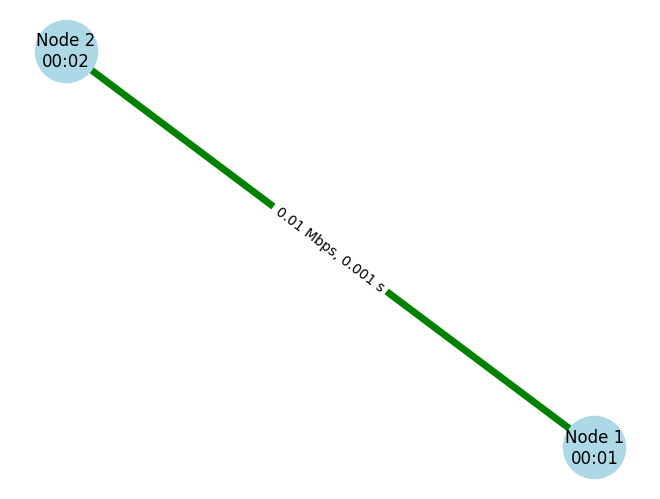

In [33]:
# Code1.7
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

class NetworkGraph:
    def __init__(self):
        self.graph = nx.Graph()

    def add_node(self, node_id, label):
        self.graph.add_node(node_id, label=label)
    
    def add_link(self, node1_id, node2_id, label, bandwidth, delay):
        self.graph.add_edge(node1_id, node2_id, label=label, bandwidth=bandwidth, delay=delay)

    def draw(self):
        # リンクの帯域幅に基づいて線の太さを決定する関数
        def get_edge_width(bandwidth):
            return np.log10(bandwidth)+1 # bps単位での対数スケール
        
        # リンクの遅延に基づいて線の色を決定する関数
        def get_edge_color(delay):
            if delay <= 0.001: # 1ms以下
                return 'green'
            elif delay <= 0.01: # 1-10ms
                return 'yellow'
            else: # 10ms以上
                return 'red'
            
        pos = nx.spring_layout(self.graph)
        edge_widths = [get_edge_width(self.graph[u][v]['bandwidth']) for u, v in self.graph.edges()]
        edge_colors = [get_edge_color(self.graph[u][v]['delay']) for u, v in self.graph.edges()]
        nx.draw(self.graph, pos, with_labels=False, node_color='lightblue', node_size=2000, width=edge_widths, edge_color=edge_colors)
        nx.draw_networkx_labels(self.graph, pos, labels=nx.get_node_attributes(self.graph, 'label'))
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=nx.get_edge_attributes(self.graph, 'label'))
        plt.show()

class Node:
    def __init__(self, node_id, address, network_graph):
        self.node_id = node_id
        self.address = address
        self.links = []
        self.network_graph = network_graph

        # グラフにノードを追加
        label = f'Node {node_id}\n{address}'
        self.network_graph.add_node(node_id, label)

    def add_link(self, link):
        if link not in self.links:
            self.links.append(link)

    def send_packet(self, packet):
        if packet.destination == self.address:
            self.receive_packet(packet)
        else:
            for link in self.links:
                next_node = link.node_x if self != link.node_x else link.node_y
                print(f"ノード {self.node_id}からノード{next_node.node_id}へパケット転送")
                link.transfer_packet(packet, self)
                break
    
    def receive_packet(self, packet):
        print(f"ノード{self.node_id}がパケットを受信: {packet.payload}")
    
    def __str__(self):
        connected_nodes = [link.node_x.node_id if self != link.node_x else link.node_y.node_id for link in self.links]
        connected_nodes_str = ', '.join(map(str, connected_nodes))
        return f"ノード(ID: {self.node_id}, アドレス: {self.address}, 接続: {connected_nodes_str})"

class Link:
    def __init__(self, node_x, node_y, network_graph, bandwidth=10000, delay=0.001, packet_loss=0.0):
        self.node_x = node_x
        self.node_y = node_y
        self.bandwidth = bandwidth
        self.delay = delay
        self.packet_loss = packet_loss
        self.network_graph = network_graph

        node_x.add_link(self)
        node_y.add_link(self)

        # グラフにリンクを追加
        label = f'{bandwidth/1000000} Mbps, {delay} s'
        self.network_graph.add_link(node_x.node_id, node_y.node_id, label, self.bandwidth, self.delay)

    def transfer_packet(self, packet, from_node):
        next_node = self.node_x if from_node != self.node_x else self.node_y
        next_node.receive_packet(packet)

    def __str__(self):
        return f"リンク({self.node_x.node_id} ↔ {self.node_y.node_id}, 帯域幅: {self.bandwidth}, 遅延: {self.delay}, パケットロス率: {self.packet_loss})"
    
class Packet:
    def __init__(self, source, destination, payload):
        self.source = source
        self.destination = destination
        self.payload = payload

    def __str__(self):
        return f"パケット(送信元: {self.source}, 宛先: {self.destination}, ペイロード: {self.payload})"
    
# ネットワークグラフのインスタンスを作成
network_graph = NetworkGraph()

# ノードとリンクの宣言
node1 = Node(node_id=1, address='00:01', network_graph=network_graph)
node2 = Node(node_id=2, address='00:02', network_graph=network_graph)
link1 = Link(node1, node2, network_graph=network_graph)

# グラフを描画
network_graph.draw()

In [39]:
# Practice1-1
network_graph = NetworkGraph()

node1 = Node(node_id=1, address="00:01",network_graph=network_graph)
node2 = Node(node_id=2, address="00:02",network_graph=network_graph)
link1 = Link(node1, node2, network_graph=network_graph)

# パケットの作成と送信
packet = Packet(source=node2.address, destination=node1.address, payload="Hello, Node1!")
node1.send_packet(packet)

ノード1がパケットを受信: Hello, Node1!


In [38]:
# Practice1-2
payload_list = ["1","2","3","4","5","6","7","8","9","10"]
for payload in payload_list:
    packet = Packet(source=node1.address, destination=node2.address, payload=payload)
    node1.send_packet(packet)

ノード 1からノード2へパケット転送
ノード2がパケットを受信: 1
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 2
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 3
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 4
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 5
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 6
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 7
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 8
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 9
ノード 1からノード2へパケット転送
ノード2がパケットを受信: 10


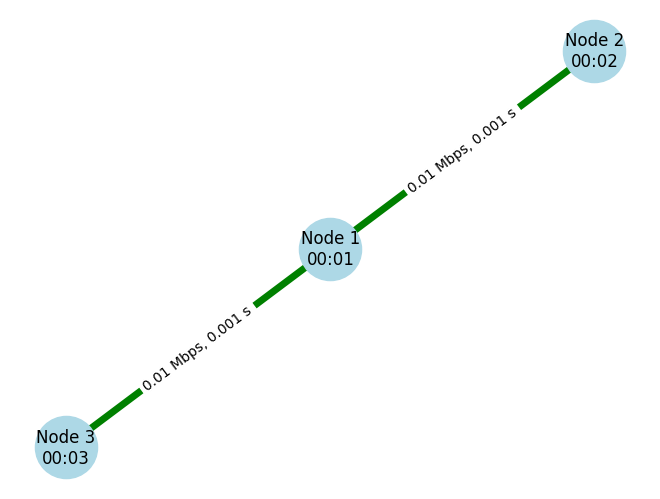

In [41]:
# Practice2-1
node3 = Node(node_id=3, address='00:03', network_graph=network_graph)
link1 = Link(node1, node3, network_graph=network_graph)

# グラフを描画
network_graph.draw()

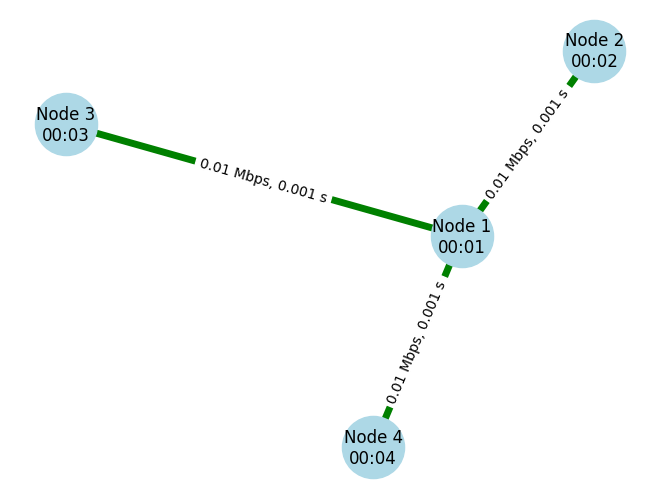

In [42]:
# Practice2-2
node4 = Node(node_id=4, address='00:04', network_graph=network_graph)
link1 = Link(node1, node4, network_graph=network_graph)

# グラフを描画
network_graph.draw()

## 第2章　ネットワークと時間

In [ ]:
import uuid

class Packet:
    # Packetクラスのコンストラクタ
    def __init__(self, source, destination, header_size, payload_size, network_event_scheduler):
        self.network_event_scheduler = network_event_scheduler
        self.id = str(uuid.uuid4()) # パケットに一意のID（UUID）を割り当てる
        
        # パケットのヘッダ情報を辞書で定義
        self.header = {
            "source": source,              # 送信元アドレス
            "destination": destination     # 宛先アドレス
        }
        self.payload = 'X' * payload_size     # パケットのペイロード（実際に送信するデータ）
        self.size = header_size + payload_size     # パケット全体のサイズ
        self.creation_time = self.network_event_scheduler.current_time     # パケット生成時刻の記録
        self.arrival_time = None     # パケット到着時刻（初期値はNone）

    # 到着時刻を設定するメソッド
    def set_arrived(self, arrival_time):
        self.arrival_time = arrival_time     # 到着時刻を設定
    
    # heapqモジュールでの比較のための特殊メソッド
    # この実装では比較を行わないため、常にFalseを返す
    def __lt__(self, other):
        return False
    
    # パケットの文字列表現を返す特殊メソッド
    def __str__(self):
        return f'パケット(送信元: {self.header["source"]}, 宛先: {self.header["destinatino"]}, ペイロード: {self.payload})'